In [4]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from pandas import melt, pivot_table
import seaborn as sb
import numpy as np

In [9]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()



plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


# [3]데이터 가져오기

In [12]:
origin = load_data('unemployment_age')
origin

[data] https://data.hossam.kr/data/lab06/unemployment_age.xlsx
[desc] 2000년부터 2022년까지 행정구역(시도)/연령별 실업률 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,NaN,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,NaN,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,NaN,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2
5,NaN,60세이상,5.3,3.6,2.1,1.5,1.0,2.8,3.1,2.8,...,2.6,2.4,2.6,2.8,3.6,2.9,3.9,3.7,3.3,2.8
6,대구광역시,15-29세,9.1,9.8,9.2,9.8,8.6,8.7,9.5,8.9,...,9.9,11.5,10.1,12.0,11.5,12.2,8.3,9.0,7.1,6.9
7,NaN,30-59세,3.7,3.5,2.8,3.0,3.2,3.2,2.5,2.4,...,2.1,2.5,2.2,2.5,2.7,2.9,2.9,3.0,2.8,2.1
8,NaN,60세이상,0.7,1.2,1.4,2.2,1.6,2.5,1.6,2.0,...,2.2,2.1,2.5,3.8,3.4,3.7,3.1,3.2,4.6,2.9
9,인천광역시,15-29세,8.2,8.2,7.9,8.8,8.3,8.3,9.2,8.3,...,9.3,12.1,11.8,11.5,10.5,9.2,9.0,8.6,7.9,6.7


# 02.데이터 전처리

In [14]:
df = origin.copy()
df['시도별'] = df['시도별'].ffill()
df.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


# #03.시각화

##[1]년도에 따른 전국 평균 실업률 변화

In [16]:
df2  = melt(df, id_vars=['시도별', '연령계층별'],
            var_name = '년도', value_name = '실업률')
df2.head(10)

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
5,부산광역시,60세이상,2000,5.3
6,대구광역시,15-29세,2000,9.1
7,대구광역시,30-59세,2000,3.7
8,대구광역시,60세이상,2000,0.7
9,인천광역시,15-29세,2000,8.2


In [18]:
# 시/도에 따른 년도별 평균 실업률
tdf1 = df2[['시도별', '년도','실업률']].groupby(['시도별','년도'],
                                        as_index=False).mean()
tdf1

,시도별,년도,실업률
0,강원도,2000,2.766667
1,강원도,2001,2.333333
2,강원도,2002,2.100000
3,강원도,2003,2.566667
4,강원도,2004,2.633333
...,...,...,...
386,충청북도,2018,3.400000
387,충청북도,2019,4.200000
388,충청북도,2020,4.466667
389,충청북도,2021,3.433333


In [19]:
# 전국에 대한 년도별 평균 실업률
tdf2 =tdf1[['년도', '실업률']].groupby('년도').mean()
tdf2

,실업률
년도,
2000,4.103922
2001,3.762745
2002,3.154902
2003,3.437255
2004,3.582353
2005,3.584314
2006,3.488235
2007,3.343137
2008,3.282353


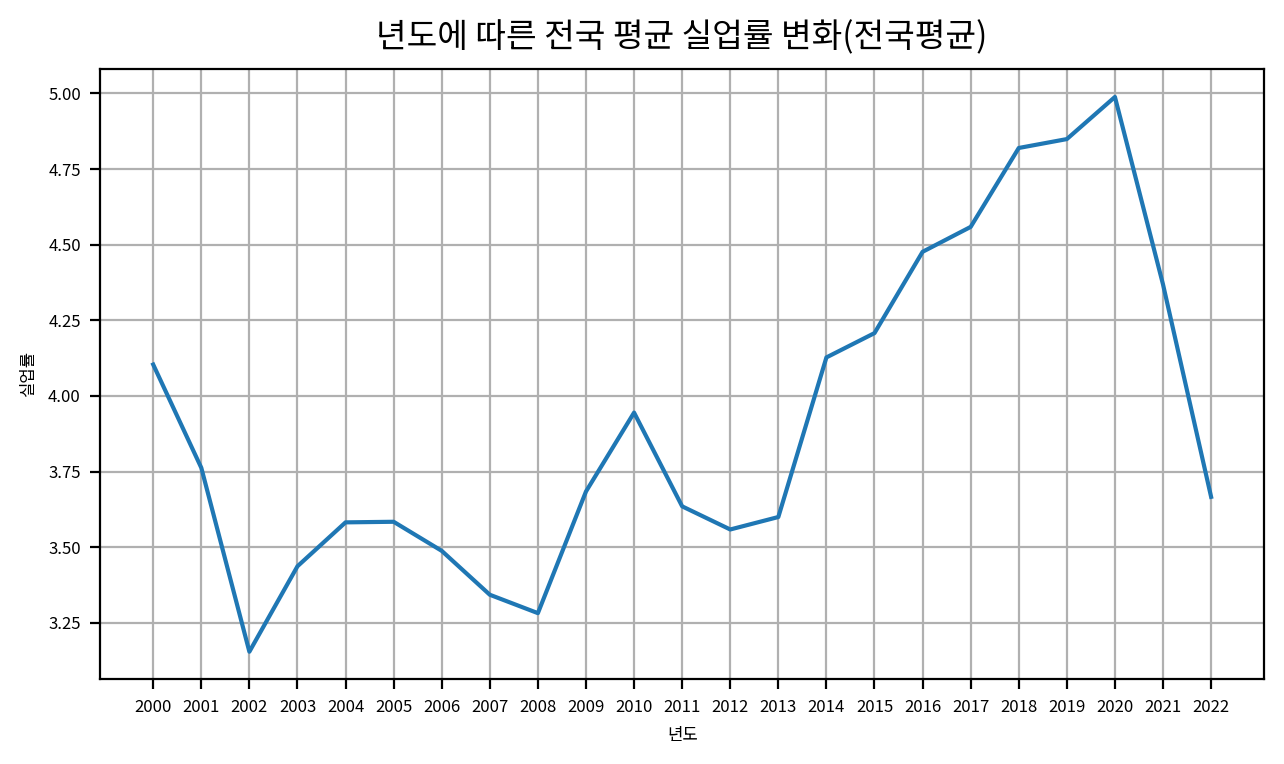

In [22]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.lineplot(data=tdf2, x=tdf2.index, y="실업률")
           

ax.set_title("년도에 따른 전국 평균 실업률 변화(전국평균)", fontsize = 12, pad=8)
ax.grid(True)
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

# [2]년도에 따른 연령대별 전국 평균 실업률 변화

In [24]:
gdf = df2.filter(['년도', '연령계층별','실업률']).groupby(['년도', '연령계층별'],as_index = False).mean()
gdf

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


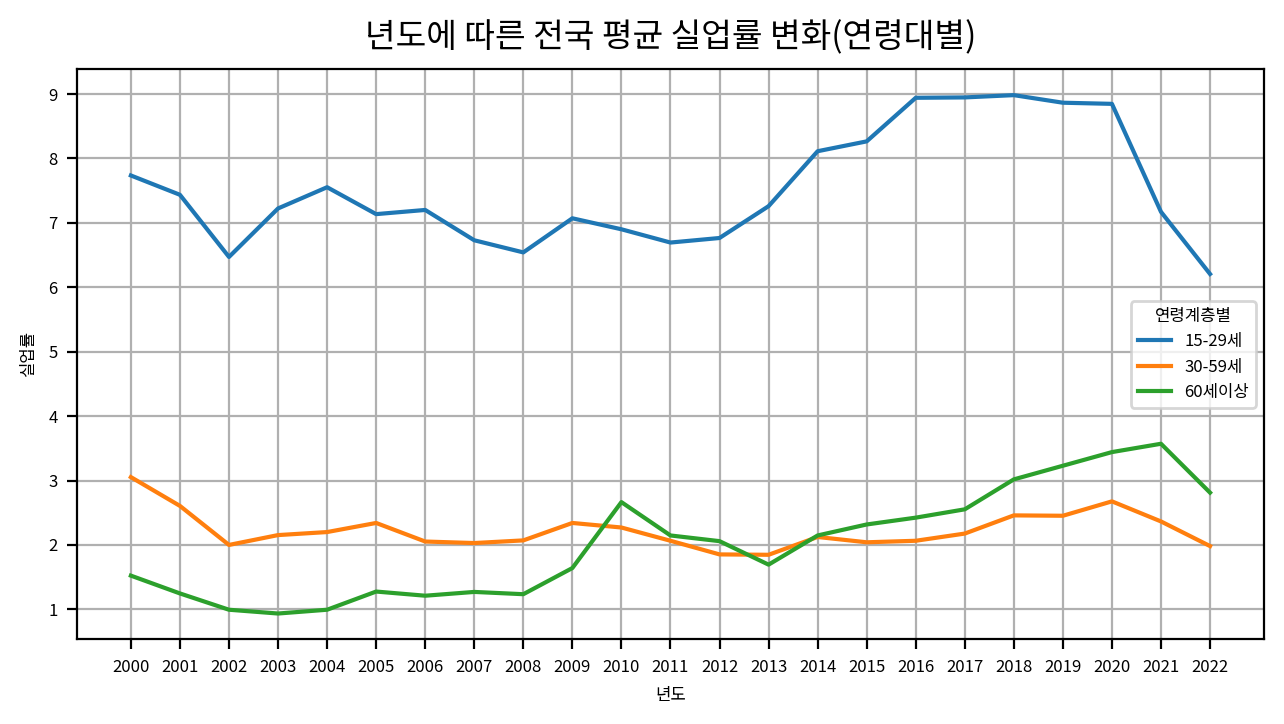

In [27]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.lineplot(data=gdf, x='년도', y = '실업률', hue='연령계층별')
           

ax.set_title("년도에 따른 전국 평균 실업률 변화(연령대별)",  fontsize = 12, pad=8)
ax.grid(True)

plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

# 04.두 그래프를 서브플롯으로 구현

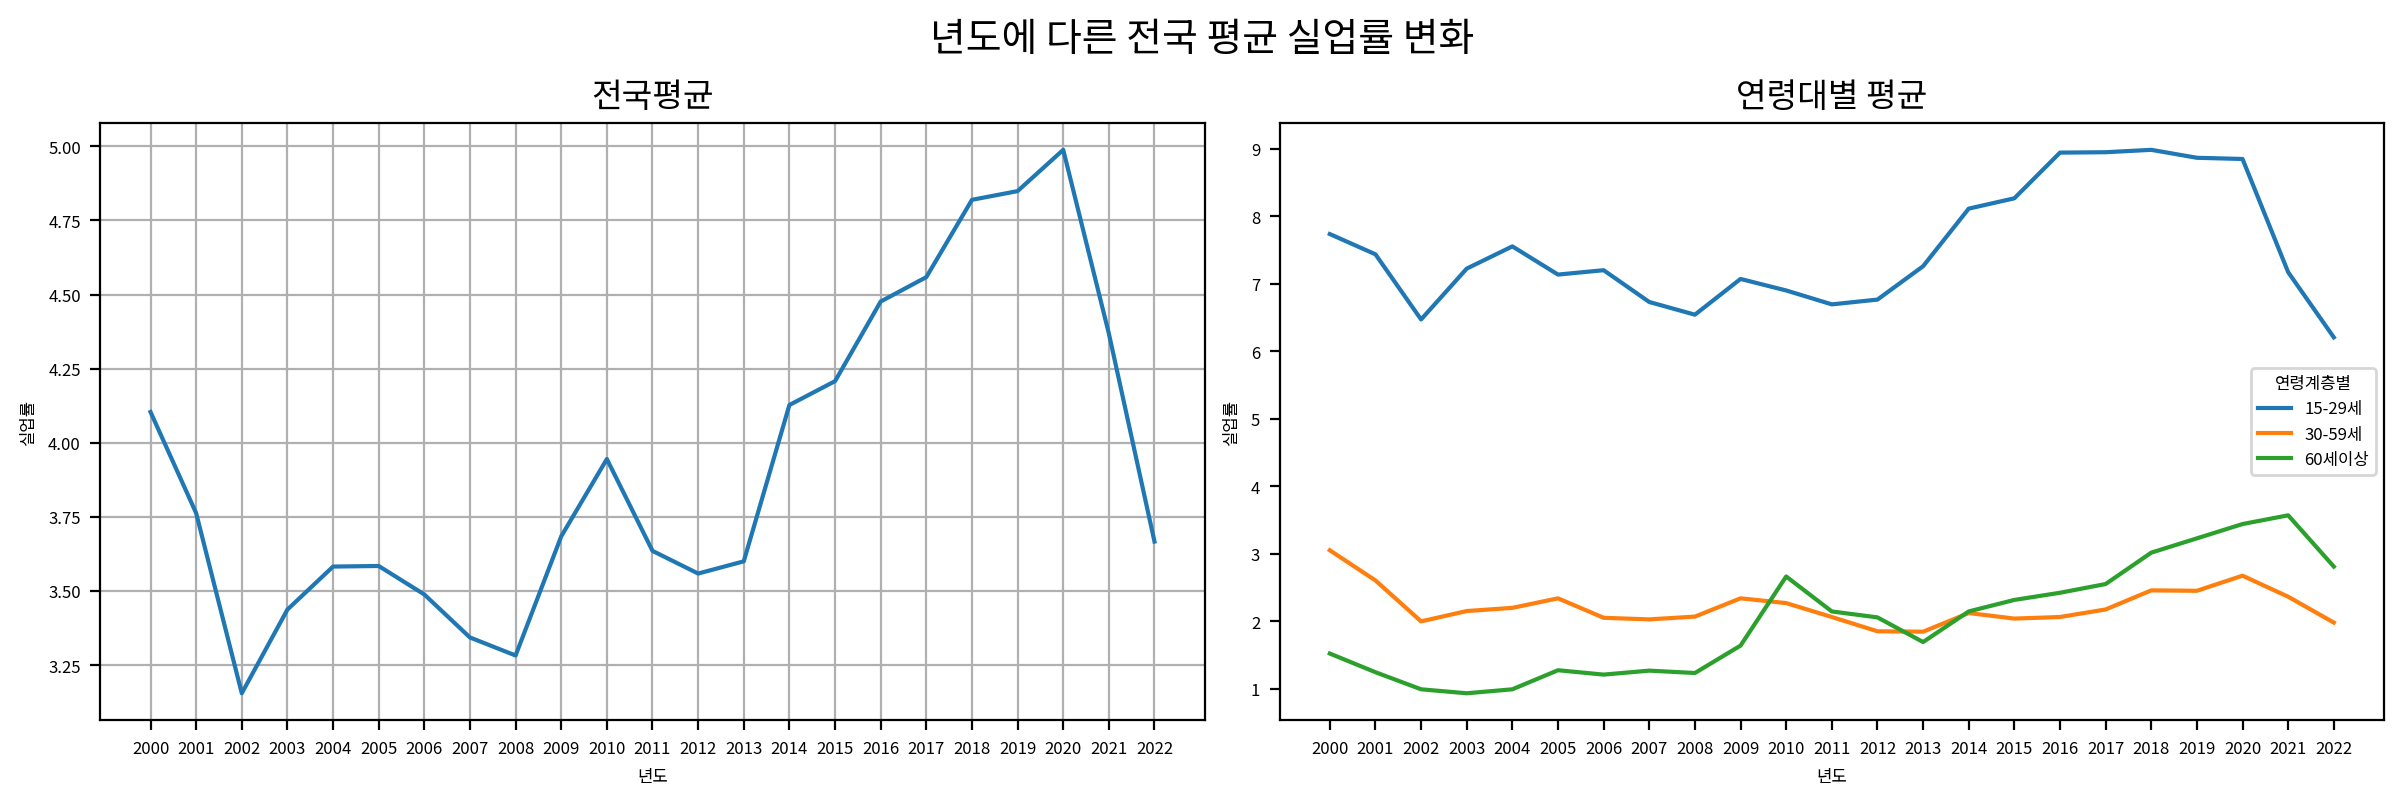

In [28]:
width_px = 2400
height_px = 800
rows = 1
cols=2
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, (ax1,ax2) = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.lineplot(data=tdf2, x=tdf2.index, y="실업률", ax = ax1)
sb.lineplot(data=gdf, x='년도', y = '실업률', hue = '연령계층별', ax=ax2)         

fig.suptitle('년도에 다른 전국 평균 실업률 변화', fontsize = 14, color = "#000000")
fig.subplots_adjust(wspace=0.2,hspace=0.2 )

ax1.title.set_text("전국평균")  
ax1.title.set_fontsize(12)
ax1.grid()

ax2.title.set_text('연령대별 평균')
ax2.title.set_fontsize(12)

plt.tight_layout()
plt.show()
plt.close()